# Análise de letras da Taylor Swift com Python e Machine Learning 🎤🎶✨

Taylor Alison Swift é uma cantora, compositora, musicista, atriz, diretora, roteirista norte-americana que nasceu no estado da Pensivânia nos Estados Unidos da América. Considerada uma das maiores artistas da atualidade, suas composições são emotivas e marcantes inspiradas em experiências pessoas, ou não, já receberam vários prêmios ao longo de sua carreira.

Aqui analisaremos suas composições ao longos dos anos, em busca de padrões e análise de sentimentos.



## Bibliotecas

O primeiro passo é importar as bibliotecas necessárias para o desenvolvimento do projeto.

In [41]:
%matplotlib inline

import pandas as pd
import string
import seaborn as sns
import matplotlib.pyplot as plt
import collections
from wordcloud import WordCloud
import nltk
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer

## Base de Dados

### Sobre a Base de Dados

A base de dados que será usada nesse projeto foi publicada no [Kaggle](https://www.kaggle.com/datasets/thespacefreak/taylor-swift-song-lyrics-all-albums) por Jan Llenzl Dagohoy e possui todos os álbuns lançados pela Taylor Swift até 20 de outubro de 2022. Sendo eles:

* Taylor Swift (2006)
* Fearless (2008)
* Speak Now (2010)
* Red (2012)
* 1989 (2014)
* Reputation (2017)
* Lover (2019)
* Folklore (2020)
* Evermore (2020)

Portanto, a base de dados não possui o Midnights, seu último trabalho, lançado em 21 de outubro de 2022 e os álbuns Speak Now e Red não são Taylor's Version. Precisando, assim, de uma adaptação.

## Carregando a Base de Dados

Precisamos carregar a base de dados para inicarmos o desenvolvimento do projeto. Aqui carregarei os arquivos direto do meu Google Drive, mas sinta-se à vontade para carregar de qualquer lugar que quiser.

In [2]:
# preparando o ambiente para carregar a base de dados
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


Os arquivos das letras estão separados por álbum, por isso, precisamos carregá-los individualmente e depois juntar em um só.

In [3]:
# taylor swift (2006)
# usando o meu caminho
ts = pd.read_csv("/content/drive/My Drive/lyrics/01-taylor_swift.csv")
ts.head()

,album_name,track_title,track_n,lyric,line
0,Taylor Swift,Tim McGraw,1,He said the way my blue eyes shined,1
1,Taylor Swift,Tim McGraw,1,Put those Georgia stars to shame that night,2
2,Taylor Swift,Tim McGraw,1,"I said, ""That's a lie""",3
3,Taylor Swift,Tim McGraw,1,Just a boy in a Chevy truck,4
4,Taylor Swift,Tim McGraw,1,That had a tendency of gettin' stuck,5


In [4]:
# fearless (taylor's version) (2008)
fl = pd.read_csv("/content/drive/My Drive/lyrics/02-fearless_taylors_version.csv")
fl.head()

,album_name,track_title,track_n,lyric,line
0,Fearless (Taylor’s Version),Fearless (Taylor’s Version),1,There's something 'bout the way,1
1,Fearless (Taylor’s Version),Fearless (Taylor’s Version),1,The street looks when it's just rained,2
2,Fearless (Taylor’s Version),Fearless (Taylor’s Version),1,"There's a glow off the pavement, you walk me t...",3
3,Fearless (Taylor’s Version),Fearless (Taylor’s Version),1,And you know I wanna ask you to dance right there,4
4,Fearless (Taylor’s Version),Fearless (Taylor’s Version),1,"In the middle of the parking lot, yeah",5


In [7]:
# speak now taylor's version (2010)
sn = pd.read_csv("/content/drive/My Drive/lyrics/03-speak_now_taylors_version.csv")
sn.head()

,album_name,track_title,track_n,lyric,line
0,Speak Now Taylor's Version,Mine (Taylor’s Version),1,"Ah-ah, ah-ah",1
1,Speak Now Taylor's Version,Mine (Taylor’s Version),1,"Ah-ah, ah-ah",2
2,Speak Now Taylor's Version,Mine (Taylor’s Version),1,"You were in college working part-time, waiting...",3
3,Speak Now Taylor's Version,Mine (Taylor’s Version),1,"Left a small town, never looked back",4
4,Speak Now Taylor's Version,Mine (Taylor’s Version),1,I was a flight risk with a fear of falling,5


In [8]:
# red taylor's version (2012)
red = pd.read_csv("/content/drive/My Drive/lyrics/04-red_taylors_version.csv")
red.head()

,album_name,track_title,track_n,lyric,line
0,Red (Taylor’s Version),State of Grace (Taylor’s Version),1,I'm walkin' fast through the traffic lights,1
1,Red (Taylor’s Version),State of Grace (Taylor’s Version),1,Busy streets and busy lives,2
2,Red (Taylor’s Version),State of Grace (Taylor’s Version),1,And all we know is touch and go,3
3,Red (Taylor’s Version),State of Grace (Taylor’s Version),1,We are alone with our changing minds,4
4,Red (Taylor’s Version),State of Grace (Taylor’s Version),1,We fall in love 'til it hurts or bleeds,5


In [9]:
# 1989 (2014)
um989 = pd.read_csv("/content/drive/My Drive/lyrics/05-1989_deluxe.csv")
um989.head()

,album_name,track_title,track_n,lyric,line
0,1989 (Deluxe),Welcome to New York,1,"Walking through a crowd, the village is aglow",1
1,1989 (Deluxe),Welcome to New York,1,Kaleidoscope of loud heartbeats under coats,2
2,1989 (Deluxe),Welcome to New York,1,Everybody here wanted something more,3
3,1989 (Deluxe),Welcome to New York,1,Searching for a sound we hadn't heard before,4
4,1989 (Deluxe),Welcome to New York,1,And it said,5


In [10]:
# reputation (2017)
rep = pd.read_csv("/content/drive/My Drive/lyrics/06-reputation.csv")
rep.head()

,album_name,track_title,track_n,lyric,line
0,reputation,...Ready for It?,1,Knew he was a killer first time that I saw him,1
1,reputation,...Ready for It?,1,Wondered how many girls he had loved and left ...,2
2,reputation,...Ready for It?,1,"But if he's a ghost, then I can be a phantom",3
3,reputation,...Ready for It?,1,"Holdin' him for ransom, some",4
4,reputation,...Ready for It?,1,"Some boys are tryin' too hard, he don't try at...",5


In [11]:
# lover (2019)
lover = pd.read_csv("/content/drive/My Drive/lyrics/07-lover.csv")
lover.head()

,album_name,track_title,track_n,lyric,line
0,Lover,I Forgot That You Existed,1,How many days did I spend thinking,1
1,Lover,I Forgot That You Existed,1,"'Bout how you did me wrong, wrong, wrong?",2
2,Lover,I Forgot That You Existed,1,Lived in the shade you were throwing,3
3,Lover,I Forgot That You Existed,1,"'Til all of my sunshine was gone, gone, gone",4
4,Lover,I Forgot That You Existed,1,And I couldn't get away from ya,5


In [12]:
# folklore (2020)
folk = pd.read_csv("/content/drive/My Drive/lyrics/08-folklore_deluxe_version.csv")
folk.head()

,album_name,track_title,track_n,lyric,line
0,folklore (deluxe version),the 1,1,"I'm doing good, I'm on some new shit",1
1,folklore (deluxe version),the 1,1,"Been saying ""yes"" instead of ""no""",2
2,folklore (deluxe version),the 1,1,"I thought I saw you at the bus stop, I didn't ...",3
3,folklore (deluxe version),the 1,1,I hit the ground running each night,4
4,folklore (deluxe version),the 1,1,I hit the Sunday matinée,5


In [13]:
# evermore (2020)
eve = pd.read_csv("/content/drive/My Drive/lyrics/09-evermore_deluxe_version.csv")
eve.head()

,album_name,track_title,track_n,lyric,line
0,evermore (deluxe version),willow,1,I'm like the water when your ship rolled in th...,1
1,evermore (deluxe version),willow,1,"Rough on the surface, but you cut through like...",2
2,evermore (deluxe version),willow,1,And if it was an open-shut case,3
3,evermore (deluxe version),willow,1,I never would've known from that look on your ...,4
4,evermore (deluxe version),willow,1,Lost in your current like a priceless wine,5


In [14]:
# midnights (2022)
mn = pd.read_csv("/content/drive/My Drive/lyrics/10-midnights_til_dawn_edition.csv")
mn.head()

,album_name,track_title,track_n,lyric,line
0,Midnights (The Til Dawn Edition),Lavender Haze,1,Meet me at midnight,1
1,Midnights (The Til Dawn Edition),Lavender Haze,1,Staring at the ceiling with you,2
2,Midnights (The Til Dawn Edition),Lavender Haze,1,"Oh, you don't ever say too much",3
3,Midnights (The Til Dawn Edition),Lavender Haze,1,And you don't really read into,4
4,Midnights (The Til Dawn Edition),Lavender Haze,1,My melancholia,5


Agora que temos todos os álbuns carregados, iremos concatenar todos em um só.

In [17]:
# concatenando todos
lyrics = pd.concat([ts, fl, sn, red, um989, rep, lover, folk, eve, mn])
lyrics.head()

,album_name,track_title,track_n,lyric,line
0,Taylor Swift,Tim McGraw,1,He said the way my blue eyes shined,1
1,Taylor Swift,Tim McGraw,1,Put those Georgia stars to shame that night,2
2,Taylor Swift,Tim McGraw,1,"I said, ""That's a lie""",3
3,Taylor Swift,Tim McGraw,1,Just a boy in a Chevy truck,4
4,Taylor Swift,Tim McGraw,1,That had a tendency of gettin' stuck,5


Enfim temos a nossa base de dados com todos os álbuns corretamente adicionados.

In [18]:
lyrics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10203 entries, 0 to 1195
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   album_name   10203 non-null  object
 1   track_title  10203 non-null  object
 2   track_n      10203 non-null  int64 
 3   lyric        10203 non-null  object
 4   line         10203 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 478.3+ KB


## Adicionando informações essenciais

Precisamos adicionar algumas informações que são essenciais ao nosso projeto. Como vamos fazer uma análise das composições da Taylor Swift ao longo dos anos, ter a data de lançamento de cada álbum é essencial, mas a nossa base de dados não possui essa informação. Por isso, precisamos adicionar os anos.

In [27]:
# lista de todos os álbuns na base de dados
nomes = lyrics.album_name.unique()
print(nomes)

['Taylor Swift' 'Fearless (Taylor’s Version)' "Speak Now Taylor's Version"
 'Red (Taylor’s Version)' '1989 (Deluxe)' 'reputation' 'Lover'
 'folklore (deluxe version)' 'evermore (deluxe version)'
 'Midnights (The Til Dawn Edition)']


In [28]:
def album_release(row):
  '''
  função que mapeia o álbum a uma data de lançamento
  '''
  if row['album_name'] == nomes[0]:
      return '2006'
  elif row['album_name'] == nomes[1]:
      return '2008'
  elif row['album_name'] == nomes[2]:
      return '2010'
  elif row['album_name'] == nomes[3]:
      return '2012'
  elif row['album_name'] == nomes[4]:
      return '2014'
  elif row['album_name'] == nomes[5]:
      return '2017'
  elif row['album_name'] == nomes[6]:
      return '2019'
  elif row['album_name'] == nomes[7]:
      return '2020'
  # sabemos que folklore e evermore foram lançados no mesmo ano, mas para facilitar nossa análise, colocaremos anos distintos
  elif row['album_name'] == nomes[8]:
      return '2021'
  #this is slightly differently formatted because the album name is recorded two ways.
  elif row['album_name'] == 'Midnights (The Til Dawn Edition)':
      return '2022'

  return 'No Date'

lyrics['album_year'] = lyrics.apply(lambda row: album_release(row), axis=1)

lyrics.head()

,album_name,track_title,track_n,lyric,line,album_year
0,Taylor Swift,Tim McGraw,1,He said the way my blue eyes shined,1,2006
1,Taylor Swift,Tim McGraw,1,Put those Georgia stars to shame that night,2,2006
2,Taylor Swift,Tim McGraw,1,"I said, ""That's a lie""",3,2006
3,Taylor Swift,Tim McGraw,1,Just a boy in a Chevy truck,4,2006
4,Taylor Swift,Tim McGraw,1,That had a tendency of gettin' stuck,5,2006


## Limpando o Texto

A fim de melhorar nossos resultados, precisamos limpar nossos textos. Assim, iremos:

* Colocar todo o texto em letras minúsculas;
* Remover pontuação;
* Excluir as stops words;

In [32]:
# colocando tudo em minúsculo
lyrics['clean_lyric'] = lyrics['lyric'].str.lower()
lyrics.head()

,album_name,track_title,track_n,lyric,line,album_year,clean_lyrics,clean_lyric
0,Taylor Swift,Tim McGraw,1,He said the way my blue eyes shined,1,2006,he said the way my blue eyes shined,he said the way my blue eyes shined
1,Taylor Swift,Tim McGraw,1,Put those Georgia stars to shame that night,2,2006,put those georgia stars to shame that night,put those georgia stars to shame that night
2,Taylor Swift,Tim McGraw,1,"I said, ""That's a lie""",3,2006,"i said, ""that's a lie""","i said, ""that's a lie"""
3,Taylor Swift,Tim McGraw,1,Just a boy in a Chevy truck,4,2006,just a boy in a chevy truck,just a boy in a chevy truck
4,Taylor Swift,Tim McGraw,1,That had a tendency of gettin' stuck,5,2006,that had a tendency of gettin' stuck,that had a tendency of gettin' stuck


In [33]:
# removendo pontuação
lyrics['clean_lyric'] = lyrics['clean_lyric'].str.replace('[^\w\s]', '')
lyrics.head()

<ipython-input-33-a97e8a5c3d49>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  lyrics['clean_lyric'] = lyrics['clean_lyric'].str.replace('[^\w\s]', '')


,album_name,track_title,track_n,lyric,line,album_year,clean_lyrics,clean_lyric
0,Taylor Swift,Tim McGraw,1,He said the way my blue eyes shined,1,2006,he said the way my blue eyes shined,he said the way my blue eyes shined
1,Taylor Swift,Tim McGraw,1,Put those Georgia stars to shame that night,2,2006,put those georgia stars to shame that night,put those georgia stars to shame that night
2,Taylor Swift,Tim McGraw,1,"I said, ""That's a lie""",3,2006,"i said, ""that's a lie""",i said thats a lie
3,Taylor Swift,Tim McGraw,1,Just a boy in a Chevy truck,4,2006,just a boy in a chevy truck,just a boy in a chevy truck
4,Taylor Swift,Tim McGraw,1,That had a tendency of gettin' stuck,5,2006,that had a tendency of gettin' stuck,that had a tendency of gettin stuck


In [35]:
# removendo stop words
# criando uma pequena lista de stop words em inglês
stop = ['the', 'a', 'this', 'that', 'to', 'is', 'am', 'was', 'were', 'be', 'being', 'been']

In [36]:
lyrics['clean_lyric'] = lyrics['clean_lyric'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
lyrics.head()

,album_name,track_title,track_n,lyric,line,album_year,clean_lyrics,clean_lyric
0,Taylor Swift,Tim McGraw,1,He said the way my blue eyes shined,1,2006,he said the way my blue eyes shined,he said way my blue eyes shined
1,Taylor Swift,Tim McGraw,1,Put those Georgia stars to shame that night,2,2006,put those georgia stars to shame that night,put those georgia stars shame night
2,Taylor Swift,Tim McGraw,1,"I said, ""That's a lie""",3,2006,"i said, ""that's a lie""",i said thats lie
3,Taylor Swift,Tim McGraw,1,Just a boy in a Chevy truck,4,2006,just a boy in a chevy truck,just boy in chevy truck
4,Taylor Swift,Tim McGraw,1,That had a tendency of gettin' stuck,5,2006,that had a tendency of gettin' stuck,had tendency of gettin stuck


## Tokenizando as letras

Para uma análise mais sofisticada, vamos tokenizar a nossa letra. Tokenizar é transformar cada linha da letra em uma lista de palavras, o que é melhor para analisar textos do que simplesmente separar as palavras por espaços em branco.

In [37]:
# tokenizando as letras
lyrics['lyrics_tok'] = lyrics['clean_lyric'].str.split(' ')
lyrics.head()

,album_name,track_title,track_n,lyric,line,album_year,clean_lyrics,clean_lyric,lyrics_tok
0,Taylor Swift,Tim McGraw,1,He said the way my blue eyes shined,1,2006,he said the way my blue eyes shined,he said way my blue eyes shined,"[he, said, way, my, blue, eyes, shined]"
1,Taylor Swift,Tim McGraw,1,Put those Georgia stars to shame that night,2,2006,put those georgia stars to shame that night,put those georgia stars shame night,"[put, those, georgia, stars, shame, night]"
2,Taylor Swift,Tim McGraw,1,"I said, ""That's a lie""",3,2006,"i said, ""that's a lie""",i said thats lie,"[i, said, thats, lie]"
3,Taylor Swift,Tim McGraw,1,Just a boy in a Chevy truck,4,2006,just a boy in a chevy truck,just boy in chevy truck,"[just, boy, in, chevy, truck]"
4,Taylor Swift,Tim McGraw,1,That had a tendency of gettin' stuck,5,2006,that had a tendency of gettin' stuck,had tendency of gettin stuck,"[had, tendency, of, gettin, stuck]"


## Procurando palavras que mais se repetem

Agora, colocaremos a mão na massa. Nosso primeiro passo é encontrar palavras que mais se repetem em toda a discografia da loirinha e em cada álbum também.

O código a seguir descobre a frequência de cada palavra mencionada pela Taylor Swift.

In [46]:
# criando uma lista de todas as palavras que aparecem na discografia
word_list = [word for list_ in lyrics['lyrics_tok'] for word in list_]

# descobrindo a frequência de cada palavra que é mencionada na discografia
word_frequency = collections.Counter(word_list)
word_frequency = sorted(word_frequency.items(), key=lambda x: x[1], reverse=True)
word_frequency

[('you', 3414),
 ('i', 3224),
 ('and', 2051),
 ('me', 1276),
 ('it', 1156),
 ('in', 1145),
 ('my', 1029),
 ('your', 776),
 ('of', 731),
 ('all', 645),
 ('but', 629),
 ('like', 620),
 ('on', 609),
 ('im', 609),
 ('we', 597),
 ('know', 528),
 ('oh', 505),
 ('its', 494),
 ('so', 475),
 ('dont', 461),
 ('when', 456),
 ('just', 426),
 ('never', 414),
 ('for', 381),
 ('love', 378),
 ('youre', 373),
 ('what', 358),
 ('with', 354),
 ('now', 343),
 ('up', 342),
 ('time', 340),
 ('cause', 322),
 ('at', 306),
 ('if', 306),
 ('out', 300),
 ('one', 284),
 ('back', 275),
 ('down', 269),
 ('no', 268),
 ('do', 252),
 ('are', 245),
 ('say', 239),
 ('see', 237),
 ('got', 227),
 ('can', 226),
 ('they', 225),
 ('go', 213),
 ('think', 211),
 ('could', 210),
 ('there', 206),
 ('baby', 204),
 ('want', 195),
 ('he', 191),
 ('not', 188),
 ('yeah', 187),
 ('ill', 186),
 ('have', 182),
 ('cant', 181),
 ('wanna', 180),
 ('come', 174),
 ('right', 170),
 ('said', 167),
 ('had', 166),
 ('ever', 161),
 ('take', 160),

Mas ver assim em uma lista não é muito interessante, veremos então em uma forma melhor.

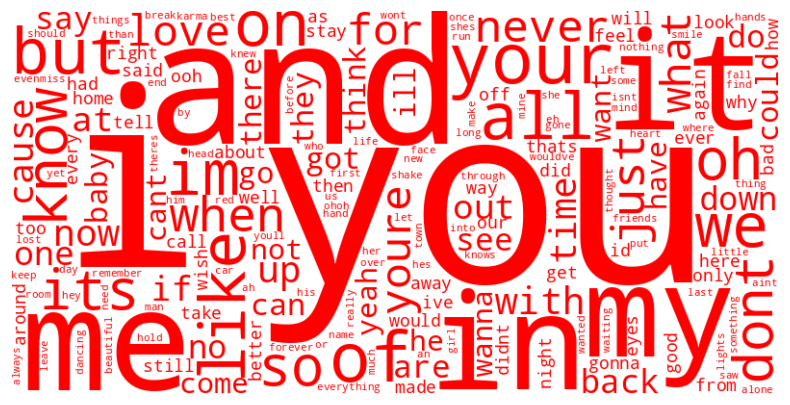

In [55]:
word_frequency_dict = {word: frequency for word, frequency in word_frequency}

# Paleta de cores de vermelho gradual
def red_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 100%, 50%)"  # Vermelho puro

# Crie a nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color="white", color_func=red_color_func)

# Gere a nuvem de palavras
wordcloud.generate_from_frequencies(word_frequency_dict)

# Exiba a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()